In [ ]:
!pip install seaborn

In [ ]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Google_Stock_Train (2010-2022).csv')

In [ ]:
df.head(2992)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
2987,2021-11-12,146.615494,148.850006,145.410995,148.677994,148.677994,22360000
2988,2021-11-15,148.900497,149.549500,147.574997,148.451996,148.451996,23508000
2989,2021-11-16,148.149506,148.762497,147.312500,147.876007,147.876007,18904000
2990,2021-11-17,148.027496,148.559494,147.240005,148.046997,148.046997,19594000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [ ]:
df.shape

(3272, 7)

In [ ]:
df.nunique()

Date         3272
Open         3204
High         3184
Low          3215
Close        3239
Adj Close    3239
Volume       3163
dtype: int64

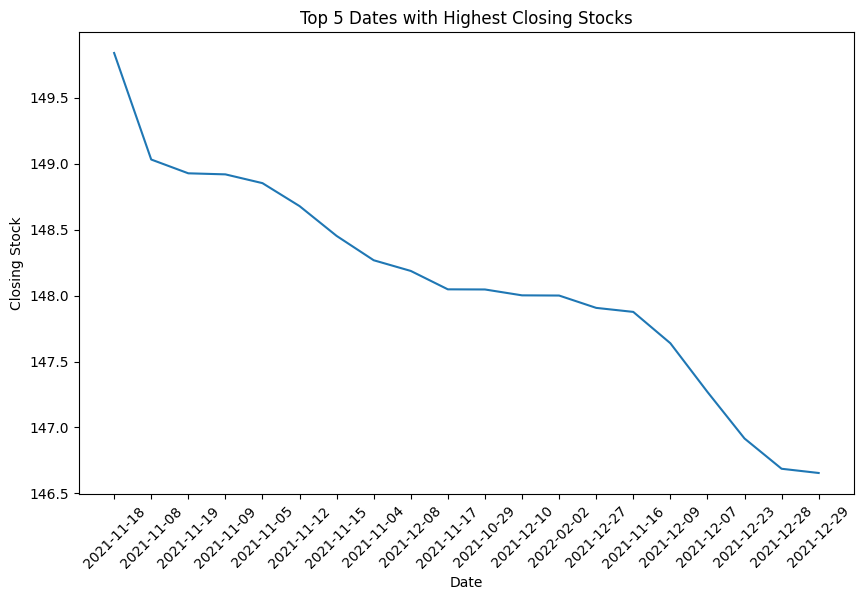

In [ ]:
def plot_top_5_highest_closing_stock(file_path):
    #Sort the DataFrame based on the "close" column in descending order
    df_sorted = df.sort_values(by='Close', ascending=False)

    #Select the top 20 rows from the sorted DataFrame
    top_20_dates = df_sorted.head(20)

    #Use seaborn to create a plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="Date", y="Close", data=top_20_dates)
    plt.xlabel('Date')
    plt.ylabel('Closing Stock')
    plt.title('Top 20 Dates with Highest Closing Stocks')
    plt.xticks(rotation=45)
    plt.show()

# Replace 'your_file_path.xlsx' with the actual path to your Excel file.
file_path = 'Google_Stock_Train (2010-2022).csv'
plot_top_5_highest_closing_stock(file_path)

In [ ]:
#find the day with the most closing stocks
def day_with_highest_close(file_path):
  #find the row of closing stocks
  max_close_stocks = df.loc[df['Close'].idxmax()]
  #extract the date of the stocks
  date_max_stocks = max_close_stocks['Date']
  return date_max_stocks
file_path = 'Google_Stock_Train (2010-2022).csv'
date_of_max_stock = day_with_highest_close(file_path)

print("Day with the highest closing stock:", date_of_max_stock)

Day with the highest closing stock: 2021-11-18


In [ ]:
!pip install scikeras

In [ ]:
#we now move to the machine learning aspect including predictions
#Here we have our test data too
# we will also use linear regression to regulate the changes in the stock prices
from keras.models import Sequential
from keras.layers import Dense
test =  pd.read_csv('/content/Google_Stock_Test (2023).csv')

In [ ]:
test.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
95,2023-05-19,123.550003,125.970001,122.150002,122.760002,122.760002,41330300
96,2023-05-22,122.940002,126.430000,122.739998,125.050003,125.050003,35253000
97,2023-05-23,124.160004,124.629997,122.209999,122.559998,122.559998,34046300
98,2023-05-24,121.120003,121.910004,119.860001,120.900002,120.900002,34182600


In [ ]:
test.drop(['Date'],axis=1)

,Open,High,Low,Close,Adj Close,Volume
0,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...
138,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,131.669998,133.240005,128.789993,129.399994,129.399994,44952100


In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
Target = ['High']
Parameters = ['Adj Close','Open','High','Low','Close','Volume']
X = test[Parameters].values
Y = test[Target].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaler = StandardScaler()
Y_scaler =StandardScaler()
x_fit = X_scaler.fit(X)
y_fit = Y_scaler.fit(Y)
# Generating the standardized values of X and y
X = x_fit.transform(X)
y = y_fit.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))